In [ ]:
# !unzip sequence_img_data.zip

In [1]:
import tensorflow as tf
import tflite_runtime

print("Tensorflow Version : ", tf.__version__)
print("Tensorflow Lite Version : ", tflite_runtime.__version__)

2023-06-30 10:28:57.202283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 10:28:59.496954: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-30 10:28:59.496973: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-30 10:29:04.899732: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Tensorflow Version :  2.11.0
Tensorflow Lite Version :  2.11.0


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential

import numpy as np
# !pip install numpy==1.20
import matplotlib.pyplot as plt
# !pip install autokeras
# import autokeras as ak
import glob
import os, cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import MobileNetV3Large

from skimage.util import random_noise

In [3]:

BATCH_SIZE=16

IMAGE_SIZE_WIDTH= 80
IMAGE_SIZE_HEIGHT = 60 
NUM_CHANNEL = 3                                   

IMAGE_SHAPE = (IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH) #(height, width)
MODEL_IMAGE_SHAPE = (IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH, NUM_CHANNEL) 

In [4]:
train_data_dir='/home/glarus/HOOK_PROJECT/DATA_COLLECTION_HOOK/single_img_data_training/train'
val_data_dir='/home/glarus/HOOK_PROJECT/DATA_COLLECTION_HOOK/single_img_data_training/val'

# Generate val data from training samples

In [67]:
# import shutil
# val_samples = 60
# for folder_name in os.listdir(train_data_dir):
#     count = 1
#     for img_path in glob.glob(f"{train_data_dir}/{folder_name}/*"):
#         img_name = img_path.split("/")[-1]
#         shutil.move(img_path, f"{val_data_dir}/{folder_name}/{img_name}")
        
#         if count == val_samples:
#             break
#         count += 1    

In [10]:
# Define the custom preprocessing function
def custom_augmentation(image):
#     print(image)
    image1 = image.copy()
    if np.random.rand() < 0.8:
        augment_type = np.random.randint(1, 6)
        print(augment_type)
        if augment_type == 1:
            image = tf.keras.preprocessing.image.random_rotation(image, 15)
        elif augment_type == 2: 
            image = tf.keras.preprocessing.image.random_shift(image, 0.15, 0.15)
        elif augment_type == 3:
            image = tf.keras.preprocessing.image.random_zoom(image, (0.85, 1.15))
        elif augment_type == 4:
            image = tf.keras.preprocessing.image.random_shear(image, 0.15)
        elif augment_type == 5:
            image = tf.keras.preprocessing.image.random_brightness(image, (0.9, 1.4))
        print(image.shape)
        
        
        cv2.imshow("ok", np.concatenate((image1, image[:,:,::-1]), axis=1).astype(np.uint8))
        key = cv2.waitKey(0) & 0xFF
#         if  key == ord('Q') or key == ord('q'):
#             break
#         else:
#             pass
        
    return image

In [300]:
np.random.rand()


0.3508215650071691

In [330]:
np.random.randint(1, 6)


5

In [9]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator





# from tensorflow.keras.layers.preprocessing.image_preprocessing import HORIZONTAL

train_datagen=ImageDataGenerator(   preprocessing_function=custom_augmentation  

                                 )

val_datagen=ImageDataGenerator(#rescale=1./255
                               )




train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=IMAGE_SHAPE, # accept height and wdith order
                                                  batch_size=BATCH_SIZE,
#                                                   color_mode="grayscale",
                                                  class_mode='sparse',
                                                  
                                                 )

val_generator=val_datagen.flow_from_directory(val_data_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
#                                               color_mode="grayscale",
                                              class_mode='sparse')






NameError: name 'custom_augmentation' is not defined

In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator





# from tensorflow.keras.layers.preprocessing.image_preprocessing import HORIZONTAL

train_datagen=ImageDataGenerator(   rotation_range=15,       # Rotate images randomly up to 20 degrees
                                    width_shift_range=0.15,   # Shift the width by a fraction of the total width
                                    height_shift_range=0.15,  # Shift the height by a fraction of the total height
                                    zoom_range=0.15,# Randomly zoom into images by up to 20%
                                    shear_range=0.15, 
#                                     zca_whitening= True,
                                    brightness_range=[0.9, 1.35], 
                                 )

val_datagen=ImageDataGenerator(#rescale=1./255
                               )




train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=IMAGE_SHAPE, # accept height and wdith order
                                                  batch_size=BATCH_SIZE,
#                                                   color_mode="grayscale",
                                                  class_mode='sparse',
                                                  
                                                 )

val_generator=val_datagen.flow_from_directory(val_data_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
#                                               color_mode="grayscale",
                                              class_mode='sparse')






Found 3170 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [385]:
# Convert DirectoryIterator to tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SIZE_HEIGHT,IMAGE_SIZE_WIDTH, NUM_CHANNEL), dtype=tf.float32),
        tf.TensorSpec(shape=(None, ), dtype=tf.float32)
    )
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SIZE_HEIGHT,IMAGE_SIZE_WIDTH, NUM_CHANNEL), dtype=tf.float32),
        tf.TensorSpec(shape=(None, ), dtype=tf.float32)
    )
)

In [384]:
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# Get all class name according to the model will be trained and class weights if unbalanced

In [6]:
class_names = list(train_generator.class_indices.keys())
NUM_CLASSES = len(class_names)
print("Class Names : ", class_names)

Class Names :  ['angle', 'none', 'pipe']


In [7]:
class_names_instances = {}
max_instances = 0
for i, folder_path in enumerate(sorted(glob.glob(train_data_dir+"/*"))):

    class_names_instances[folder_path.split("/")[-1]] = len(os.listdir(folder_path))
    if max_instances < len(os.listdir(folder_path)):
        max_instances = len(os.listdir(folder_path))
    

In [8]:
class_names_instances

{'angle': 951, 'none': 1081, 'pipe': 1138}

In [9]:
class_weights = {}


for i, class_name in enumerate(class_names):
    class_weights[i] = max_instances/class_names_instances[class_name]



for i, class_name in enumerate(class_names):
    print(f"{i} : {class_name}")
    
print(" ")

print("class_weights : ",class_weights)

0 : angle
1 : none
2 : pipe
 
class_weights :  {0: 1.1966351209253419, 1: 1.0527289546716003, 2: 1.0}


# Visualize images generated from datagen

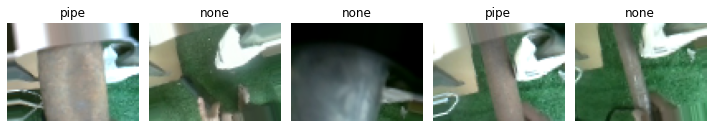

In [10]:
images, labels = next(train_generator)
batch_size =5
fig, axes = plt.subplots(nrows=1, ncols=batch_size, figsize=(10, 4))

for i in range(batch_size):
    
    # Rescale pixel values to [0, 1]
    image = images[i] / 255.0
    
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title('{}'.format(class_names[int(labels[i])]))

plt.tight_layout()
plt.show()


4
(60, 80, 3)
2
(60, 80, 3)
2
(60, 80, 3)
5
(60, 80, 3)
2
(60, 80, 3)
3
(60, 80, 3)
4
(60, 80, 3)
3
(60, 80, 3)
4
(60, 80, 3)
1
(60, 80, 3)
2
(60, 80, 3)
2
(60, 80, 3)


# Model 1

In [9]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=MODEL_IMAGE_SHAPE),
    tf.keras.layers.Rescaling(1./255), 
    
    tf.keras.layers.Conv2D(filters=4, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=6, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=NUM_CLASSES, activation='softmax')
])

#model.build(input_shape=(None, IMAGE_SIZE_WIDTH, IMAGE_SIZE_HEIGHT, NUM_CHANNEL))

model.summary()


2023-06-27 09:42:37.844396: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-27 09:42:37.844500: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (glarus-pc): /proc/driver/nvidia/version does not exist
2023-06-27 09:42:37.886248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 118, 158, 4)       112       
                                                                 
 batch_normalization (BatchN  (None, 118, 158, 4)      16        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 79, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 77, 6)         222       
                                                                 
 batch_normalization_1 (Batc  (None, 57, 77, 6)        2

In [12]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    # Depthwise convolutional layer
    # tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=MODEL_IMAGE_SHAPE),
    #tf.keras.layers.Rescaling(1./255), 
    tf.keras.layers.Conv2D(filters=4, kernel_size=3, activation='relu', input_shape=MODEL_IMAGE_SHAPE),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=6, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=2, activation='relu'),
    # Dropout layer
    tf.keras.layers.Dropout(0.25),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # Dense layers
    # tf.keras.layers.Dense(units=8, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    # Output layer
    tf.keras.layers.Dense(units=NUM_CLASSES, activation='softmax')
])

# Compile the model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 118, 158, 4)       112       
                                                                 
 batch_normalization_3 (Batc  (None, 118, 158, 4)      16        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 116, 156, 6)       222       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 58, 78, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 38, 1)         55        
                                                                 
 dropout_1 (Dropout)         (None, 28, 38, 1)        

# Model 2

In [34]:
# https://github.com/Haikoitoh/paper-implementation/blob/main/MobileNetV2.ipynb

from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, ReLU, BatchNormalization, add,Softmax, AveragePooling2D, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def expansion_block(x,t,filters,block_id):
    prefix = 'block_{}_'.format(block_id)
    total_filters = t*filters
    x = Conv2D(total_filters,1,padding='same',use_bias=False, name = prefix +'expand')(x)
    x = BatchNormalization(name=prefix +'expand_bn')(x)
    x = ReLU(6,name = prefix +'expand_relu')(x)
    return x

def depthwise_block(x,stride,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = DepthwiseConv2D(3,strides=(stride,stride),padding ='same', use_bias = False, name = prefix + 'depthwise_conv')(x)
    x = BatchNormalization(name=prefix +'dw_bn')(x)
    x = ReLU(6,name=prefix +'dw_relu')(x)
    return x

def projection_block(x,out_channels,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = Conv2D(filters = out_channels,kernel_size = 1,padding='same',use_bias=False,name= prefix + 'compress')(x)
    x = BatchNormalization(name=prefix +'compress_bn')(x)
    return x


def Bottleneck(x,t,filters, out_channels,stride,block_id):
    y = expansion_block(x,t,filters,block_id)
    y = depthwise_block(y,stride,block_id)
    y = projection_block(y, out_channels,block_id)
    if y.shape[-1]==x.shape[-1]:
        y = add([x,y])
    return y


def MobileNetV2(input_image = (224,224,3), n_classes=1000):
    input = Input(input_image)

    # x1 = tf.keras.layers.AveragePooling2D(pool_size=(5, 5), strides=3)(input)
    # x2 = tf.keras.layers.MaxPooling2D(pool_size=(5, 5), strides=3)(input)
    # x = tf.keras.layers.Concatenate()([x1, x2])    

    x = Conv2D(1,kernel_size=3,strides=(2, 2),padding = 'same', use_bias=False)(input)
    x = BatchNormalization(name='conv1_bn')(x)
    x = ReLU(6, name = 'conv1_relu')(x)

    # 17 Bottlenecks

    x = depthwise_block(x,stride=1,block_id=1)
    x = projection_block(x, out_channels=4,block_id=1)

    x = Bottleneck(x, t = 1, filters = x.shape[-1], out_channels = 6, stride = 2,block_id = 2)
    x = Bottleneck(x, t = 1, filters = x.shape[-1], out_channels = 6, stride = 1,block_id = 3)

    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 2,block_id = 4)
    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 5)
    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 6)

    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 2,block_id = 7)
    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 8)
    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 9)
    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 10)

    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 11)
    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 12)
    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 13)

    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 2,block_id = 14)
    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 15)
    # x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 16)

    # x = Bottleneck(x, t = 2, filters = x.shape[-1], out_channels = 8, stride = 1,block_id = 17)


    #1*1 conv
    x = Conv2D(filters = 1,kernel_size = 5,padding='valid',use_bias=False, name = 'last_conv')(x)
    x = BatchNormalization(name='last_bn')(x)
    x = ReLU(6,name='last_relu')(x)


    x = Flatten()(x)
    


    output = Dense(n_classes,activation='softmax')(x)

    model = Model(input, output)

    return model




model = MobileNetV2(MODEL_IMAGE_SHAPE, NUM_CLASSES)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 45, 240, 3)] 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 23, 120, 1)   27          input_4[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 23, 120, 1)   4           conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 23, 120, 1)   0           conv1_bn[0][0]                   
____________________________________________________________________________________________

# Model 3

In [162]:
# https://github.com/Haikoitoh/paper-implementation/blob/main/MobileNetV2.ipynb

from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, ReLU, BatchNormalization, add,Softmax, AveragePooling2D, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def expansion_block(x,t,filters,block_id):
    prefix = 'block_{}_'.format(block_id)
    total_filters = t*filters
    x = Conv2D(total_filters,1,padding='same',use_bias=False, name = prefix +'expand')(x)
    x = BatchNormalization(name=prefix +'expand_bn')(x)
    x = ReLU(6,name = prefix +'expand_relu')(x)
    return x

def depthwise_block(x,stride,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = DepthwiseConv2D(3,strides=(stride,stride),padding ='same', use_bias = False, name = prefix + 'depthwise_conv')(x)
    x = BatchNormalization(name=prefix +'dw_bn')(x)
    x = ReLU(6,name=prefix +'dw_relu')(x)
    return x

def projection_block(x,out_channels,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = Conv2D(filters = out_channels,kernel_size = 1,padding='same',use_bias=False,name= prefix + 'compress')(x)
    x = BatchNormalization(name=prefix +'compress_bn')(x)
    return x


def Bottleneck(x,t,filters, out_channels,stride,block_id):
    y = expansion_block(x,t,filters,block_id)
    y = depthwise_block(y,stride,block_id)
    y = projection_block(y, out_channels,block_id)
    if y.shape[-1]==x.shape[-1]:
        y = add([x,y])
    return y


def MobileNetV2(input_image = (224,224,3), n_classes=1000):
    input = Input(input_image)

    x = Conv2D(2,kernel_size=(3, 3),strides=(3, 3),padding = 'valid', use_bias=True)(input)
    x = BatchNormalization()(x)
    x = ReLU(6)(x)
    
    x = Conv2D(2,kernel_size=(3, 3),strides=(3, 3),padding = 'valid', use_bias=True)(x)
    x = BatchNormalization()(x)
    x = ReLU(6)(x)
    
#     x = Conv2D(1,kernel_size=(3, 3),strides=(3, 3),padding = 'valid', use_bias=True)(x)
#     x = BatchNormalization()(x)
#     x = ReLU(6)(x)
    
#     x = Conv2D(1,kernel_size=(3, 3),strides=(3, 3),padding = 'valid', use_bias=True)(x)
#     x = BatchNormalization(name='conv3_bn')(x)
#     x = ReLU(6, name = 'conv3_relu')(x)
    
#     x = Conv2D(1,kernel_size=(5, 5),strides=(3, 3),padding = 'valid', use_bias=False)(x)
#     x = BatchNormalization(name='conv3_bn')(x)
#     x = ReLU(6, name = 'conv3_relu')(x)
    
#     x = Conv2D(1,kernel_size=(3, 3),strides=(2, 2),padding = 'valid', use_bias=False)(x)
#     x = BatchNormalization(name='conv3_bn')(x)
#     x = ReLU(6, name = 'conv3_relu')(x)

#     x = depthwise_block(x,stride=1,block_id=1)
#     x = projection_block(x, out_channels=4,block_id=1)

#     x = Bottleneck(x, t = 1, filters = x.shape[-1], out_channels = 6, stride = 2,block_id = 2)
#     x = Bottleneck(x, t = 1, filters = x.shape[-1], out_channels = 6, stride = 1,block_id = 3)

#     x = Conv2D(filters = 1,kernel_size = 5,padding='valid',use_bias=False, name = 'last_conv')(x)
#     x = BatchNormalization(name='last_bn')(x)
#     x = ReLU(6,name='last_relu')(x)

    x = Flatten()(x)

    output = Dense(n_classes,activation='softmax', use_bias=True)(x)

    model = Model(input, output)

    return model


model = MobileNetV2(MODEL_IMAGE_SHAPE, NUM_CLASSES)
model.summary()

Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 45, 180, 3)]      0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 15, 60, 2)         56        
_________________________________________________________________
batch_normalization_28 (Batc (None, 15, 60, 2)         8         
_________________________________________________________________
re_lu_28 (ReLU)              (None, 15, 60, 2)         0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 5, 20, 2)          38        
_________________________________________________________________
batch_normalization_29 (Batc (None, 5, 20, 2)          8         
_________________________________________________________________
re_lu_29 (ReLU)              (None, 5, 20, 2)          0  

# mobile net v3 small

In [35]:


num_classes = 3

base_model = MobileNetV3Small(
                                input_shape=MODEL_IMAGE_SHAPE,
                                alpha=0.01,
                                dropout_rate=0.2,
                                minimalistic=True, # if True, aims to provide a lightweight and efficient model for image classification tasks with minimal computational resources.
                                 
                                include_top=False,
                                weights=None , #'imagenet' , None
                                
                             )
base_model.trainable = True

print(base_model.summary())

model = keras.Sequential([
    base_model,
#     layers.GlobalAveragePooling2D(),
    layers.Flatten(),
#     layers.Dense(16, activation='relu'),
#     layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])


model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 60, 80, 3)]  0           []                               
                                                                                                  
 rescaling_4 (Rescaling)        (None, 60, 80, 3)    0           ['input_13[0][0]']               
                                                                                                  
 Conv (Conv2D)                  (None, 30, 40, 16)   432         ['rescaling_4[0][0]']            
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 30, 40, 16)  64          ['Conv[0][0]']                   
 tion)                                                                             

                                                                 rm[0][0]',                       
                                                                  'expanded_conv_2/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_3/expand (Conv2D  (None, 8, 10, 32)   256         ['expanded_conv_2/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_3/expand/BatchNo  (None, 8, 10, 32)   128         ['expanded_conv_3/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 re_lu_81 

                                                                                                  
 expanded_conv_5/Add (Add)      (None, 4, 5, 8)      0           ['expanded_conv_4/Add[0][0]',    
                                                                  'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 4, 5, 24)    192         ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 4, 5, 24)    96          ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
          

 D)                                                                                               
                                                                                                  
 expanded_conv_8/project/BatchN  (None, 2, 3, 8)     32          ['expanded_conv_8/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_conv_9/expand (Conv2D  (None, 2, 3, 48)    384         ['expanded_conv_8/project/BatchNo
 )                                                               rm[0][0]']                       
                                                                                                  
 expanded_conv_9/expand/BatchNo  (None, 2, 3, 48)    192         ['expanded_conv_9/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
          

In [11]:
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 60, 80, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 60, 80, 3)    0           ['input_2[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 30, 40, 16)   432         ['rescaling_1[0][0]']            
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 30, 40, 16)  64          ['Conv[0][0]']                   
 tion)                                                                             

 re_lu_43 (ReLU)                (None, 8, 10, 40)    0           ['expanded_conv_1/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, 8, 10, 8)    320         ['re_lu_43[0][0]']               
 D)                                                                                               
                                                                                                  
 expanded_conv_1/project/BatchN  (None, 8, 10, 8)    32          ['expanded_conv_1/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_conv_2/expand (Conv2D  (None, 8, 10, 32)   256         ['expanded_conv_1/project/BatchNo
 )        

                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 8)     0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 32)    288         ['expanded_conv_3/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__operators__.add_32 (TFOpL  (None, 1, 1, 32)    0           ['expanded_conv_3/squeeze_excite/
 ambda)                                                          Conv_1[0][0]']                   
                                                                                                  
 re_lu_48 

                                                                                                  
 expanded_conv_4/project (Conv2  (None, 4, 5, 8)     384         ['expanded_conv_4/squeeze_excite/
 D)                                                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_4/project/BatchN  (None, 4, 5, 8)     32          ['expanded_conv_4/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_conv_4/Add (Add)      (None, 4, 5, 8)      0           ['expanded_conv_3/project/BatchNo
                                                                 rm[0][0]',                       
                                                                  'expanded_conv_4/project/BatchNo
          

 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 4, 5, 24)    96          ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 tf.__operators__.add_39 (TFOpL  (None, 4, 5, 24)    0           ['expanded_conv_6/expand/BatchNor
 ambda)                                                          m[0][0]']                        
                                                                                                  
 re_lu_55 (ReLU)                (None, 4, 5, 24)     0           ['tf.__operators__.add_39[0][0]']
                                                                                                  
 tf.math.m

 multiply_29 (Multiply)         (None, 4, 5, 24)     0           ['expanded_conv_7/expand/BatchNor
                                                                 m[0][0]',                        
                                                                  'tf.math.multiply_42[0][0]']    
                                                                                                  
 expanded_conv_7/depthwise (Dep  (None, 4, 5, 24)    600         ['multiply_29[0][0]']            
 thwiseConv2D)                                                                                    
                                                                                                  
 expanded_conv_7/depthwise/Batc  (None, 4, 5, 24)    96          ['expanded_conv_7/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__oper

 tf.__operators__.add_46 (TFOpL  (None, 2, 3, 48)    0           ['expanded_conv_8/depthwise/Batch
 ambda)                                                          Norm[0][0]']                     
                                                                                                  
 re_lu_62 (ReLU)                (None, 2, 3, 48)     0           ['tf.__operators__.add_46[0][0]']
                                                                                                  
 tf.math.multiply_46 (TFOpLambd  (None, 2, 3, 48)    0           ['re_lu_62[0][0]']               
 a)                                                                                               
                                                                                                  
 multiply_32 (Multiply)         (None, 2, 3, 48)     0           ['expanded_conv_8/depthwise/Batch
                                                                 Norm[0][0]',                     
          

 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 16)    0           ['expanded_conv_9/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 48)    816         ['expanded_conv_9/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__operators__.add_50 (TFOpL  (None, 1, 1, 48)    0           ['expanded_conv_9/squeeze_excite/
 ambda)                                                          Conv_1[0][0]']                   
          

                                                                                                  
 tf.math.multiply_53 (TFOpLambd  (None, 1, 1, 48)    0           ['re_lu_69[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 2, 3, 48)    0           ['multiply_36[0][0]',            
 e/Mul (Multiply)                                                 'tf.math.multiply_53[0][0]']    
                                                                                                  
 expanded_conv_10/project (Conv  (None, 2, 3, 8)     384         ['expanded_conv_10/squeeze_excite
 2D)                                                             /Mul[0][0]']                     
                                                                                                  
 expanded_

In [79]:
len(base_model.layers)

104

In [86]:
new_base_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 60, 80, 3)]       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 60, 80, 3)         0         
                                                                 
 Conv (Conv2D)               (None, 30, 40, 16)        432       
                                                                 
 Conv/BatchNorm (BatchNormal  (None, 30, 40, 16)       64        
 ization)                                                        
                                                                 
 re_lu_177 (ReLU)            (None, 30, 40, 16)        0         
                                                                 
 expanded_conv/depthwise/pad  (None, 31, 41, 16)       0         
  (ZeroPadding2D)                                          

In [56]:
try:
    for i in range(26, 102):
        try:
            layers_to_extract = base_model.layers[1:i]
            inputs = tf.keras.Input(shape=MODEL_IMAGE_SHAPE )
            x = inputs
            for layer in layers_to_extract:
                x = layer(x)
            new_base_model = tf.keras.Model(inputs, x)
            print(i)
        except:
            pass
except:
    pass

26
27
28


TensorShape([None, 60, 80, 3])

In [61]:
layers_to_extract = base_model.layers[1:29]
inputs = tf.keras.Input(shape=MODEL_IMAGE_SHAPE )
x = inputs
for layer in layers_to_extract:
    x = layer(x)
new_base_model = tf.keras.Model(inputs, x)

print(new_base_model.summary())

model = keras.Sequential([
    new_base_model,
    layers.DepthwiseConv2D(5,strides=(5,5),padding ='valid', use_bias = True),
    layers.BatchNormalization(),
    layers.ReLU(6),
    
#     layers.DepthwiseConv2D((3, 4),strides=(3,4),padding ='valid', use_bias = True),
#     layers.BatchNormalization(),
#     layers.ReLU(6),
    
    #layers.GlobalAveragePooling2D(),
    layers.Flatten(),
#     layers.Dense(16, activation='relu'),
#     layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(NUM_CLASSES, activation='softmax')
])



model.summary()


ValueError: Exception encountered when calling layer "expanded_conv_2/Add" (type Add).

A merge layer should be called on a list of inputs. Received: inputs=Tensor("Placeholder:0", shape=(None, 8, 10, 8), dtype=float32) (not a list of tensors)

Call arguments received by layer "expanded_conv_2/Add" (type Add):
  • inputs=tf.Tensor(shape=(None, 8, 10, 8), dtype=float32)

In [62]:
print(x.shape)

(None, 8, 10, 8)


In [11]:


model = keras.Sequential([
    tf.keras.layers.Input(shape=MODEL_IMAGE_SHAPE),
    tf.keras.layers.Rescaling(1./255), 
    
    layers.DepthwiseConv2D(3,strides=(2,2),padding ='valid', use_bias = True),
    layers.BatchNormalization(),
#     layers.ReLU(6),
    
    layers.Conv2D(8, 3,strides=(2, 2),padding ='valid', use_bias = True),
#     layers.BatchNormalization(),
    layers.ReLU(6),
    
    layers.DepthwiseConv2D(3,strides=(2,2),padding ='valid', use_bias = True),
    layers.BatchNormalization(),
    layers.ReLU(6),
    
    layers.Conv2D(16, 3,strides=(2,2),padding ='valid', use_bias = True),
#     layers.BatchNormalization(),
    layers.ReLU(6),
    
#     layers.DepthwiseConv2D(3,strides=(2,2),padding ='valid', use_bias = True),
# #     layers.BatchNormalization(),
#     layers.ReLU(6),    

#     layers.BatchNormalization(),
#     layers.ReLU(6),

    
#     layers.DepthwiseConv2D(3,strides=(2,2),padding ='valid', use_bias = True),
#     layers.BatchNormalization(),
#     layers.ReLU(6),
    
#     layers.DepthwiseConv2D(3,strides=(3,3),padding ='valid', use_bias = True),
#     layers.BatchNormalization(),
#     layers.ReLU(6),
    
    #layers.GlobalAveragePooling2D(),
    layers.Flatten(),
#     layers.Dense(16, activation='relu'),
#     layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(NUM_CLASSES, activation='softmax')
])



model.summary()


2023-06-30 10:29:52.636061: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-30 10:29:52.636139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (glarus-pc): /proc/driver/nvidia/version does not exist
2023-06-30 10:29:52.661475: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 60, 80, 3)         0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 29, 39, 3)        30        
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 29, 39, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 14, 19, 8)         224       
                                                                 
 re_lu (ReLU)                (None, 14, 19, 8)         0         
                                                                 
 depthwise_conv2d_1 (Depthwi  (None, 6, 9, 8)          8

# Train the model

In [36]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("image_classification_checkpoint.h5",
                             monitor='val_sparse_categorical_accuracy',
                             mode='max',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

# callbacks=[checkpoint,earlystop]
callbacks=[checkpoint]
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['sparse_categorical_accuracy'])

epochs=10

batch_size = 16

history = model.fit(     train_generator,
                        #  steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                        #validation_split=0.15,
                        callbacks=callbacks,
                         validation_data=val_generator,
                        #  validation_steps=num_val_samples//batch_size
                        class_weight=class_weights,
                    )

Epoch 1/10
198/199 [============================>.] - ETA: 0s - loss: 1.2803 - sparse_categorical_accuracy: 0.3786
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.33333, saving model to image_classification_checkpoint.h5
199/199 [==============================] - 11s 31ms/step - loss: 1.2799 - sparse_categorical_accuracy: 0.3785 - val_loss: 1.0988 - val_sparse_categorical_accuracy: 0.3333
Epoch 2/10
198/199 [============================>.] - ETA: 0s - loss: 1.1693 - sparse_categorical_accuracy: 0.4439
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.33333
199/199 [==============================] - 6s 28ms/step - loss: 1.1696 - sparse_categorical_accuracy: 0.4438 - val_loss: 1.0996 - val_sparse_categorical_accuracy: 0.3333
Epoch 3/10
198/199 [============================>.] - ETA: 0s - loss: 0.9612 - sparse_categorical_accuracy: 0.5751
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.33333
199/199 [==============================] - 6s 29ms/

In [13]:
from keras.models import load_model

# Load the .h5 model
model = load_model('image_classification_checkpoint.h5')


In [52]:


# Function to apply Gaussian noise to each image in the batch
def apply_gaussian_noise(image_batch):
    noisy_batch = np.empty_like(image_batch)
    for i, image in enumerate(image_batch):
        noisy_batch[i] = random_noise(image, mode='gaussian', var=0.01)
    return noisy_batch

epochs = 100
# Use the generator for training your model
for epoch in range(epochs):
    print(f"===================== epoch {epoch} =======================")
    for inputs, targets in train_generator:
        #noisy_inputs = apply_gaussian_noise(inputs)
        model.train_on_batch(inputs, targets)
#     for inputs, targets in val_generator:
#             #
#             result = model.evalute(inputs)   
#             print(result)

===================== epoch 0 =======================


KeyboardInterrupt: 

In [82]:
epochs = 10
steps_per_epoch = len(train_generator)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = Adam(learning_rate=0.001)

# Custom training loop
for epoch in range(epochs):
    print(f"[{epoch + 1}/{epochs}]")
    epoch_loss = 0
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy() 
    epoch_loss = 0
    for step in range(steps_per_epoch):
        inputs, targets = train_generator.next()

        with tf.GradientTape() as tape:
            # Perform data augmentation
            #noisy_inputs = ...  # Apply noise or other augmentations to inputs

            # Forward pass
            predictions = model(inputs)
            loss_value = loss_fn(targets, predictions)
            

        # Compute gradients
        gradients = tape.gradient(loss_value, model.trainable_weights)

        # Update model weights
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        
        
        epoch_loss += np.round(loss_value.numpy())
        epoch_accuracy.update_state(targets, predictions)
        
    # Calculate training accuracy for the epoch
    train_accuracy = epoch_accuracy.result()    
    # Display training progress
    print(f"       Train Loss: {np.round(epoch_loss/steps_per_epoch, 4)}, Train Acc {np.round(train_accuracy.numpy(), 4)}")


[1/10]
       Train Loss: 0.1655, Train Acc 0.8881999850273132
[2/10]
       Train Loss: 0.1151, Train Acc 0.892300009727478
[3/10]
       Train Loss: 0.1439, Train Acc 0.8851000070571899
[4/10]
       Train Loss: 0.2014, Train Acc 0.8705999851226807
[5/10]
       Train Loss: 0.1295, Train Acc 0.8791999816894531
[6/10]
       Train Loss: 0.1439, Train Acc 0.892799973487854
[7/10]
       Train Loss: 0.1151, Train Acc 0.890999972820282
[8/10]
       Train Loss: 0.1007, Train Acc 0.8863999843597412
[9/10]
       Train Loss: 0.1439, Train Acc 0.8877999782562256
[10/10]
       Train Loss: 0.1151, Train Acc 0.890999972820282


In [84]:
model.evaluate(train_generator)

139/139 [==============================] - 8s 56ms/step - loss: 0.2817 - sparse_categorical_accuracy: 0.8955


[0.28173503279685974, 0.8954750895500183]

In [27]:
epochs = 300

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

train_steps = len(train_generator)
val_steps = len(val_generator)


def apply_gaussian_noise(image_batch):
    noisy_batch = np.empty_like(image_batch)
    for i, image in enumerate(image_batch):
        noisy_batch[i] = random_noise(image, mode='gaussian', var=0.01)
    return noisy_batch

# Custom training loop
for epoch in range(epochs):
    print(f"[{epoch + 1}/{epochs}]")
    train_epoch_loss = 0.0 
    train_epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()  
    val_epoch_loss = 0.0  
    val_epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()  
    
    train_done_percent = train_steps / 20
    for step in range(train_steps):
        # Perform training steps and compute training loss and accuracy as before
        inputs, targets = train_generator.next()
        #noisy_inputs = apply_gaussian_noise(inputs)
        with tf.GradientTape() as tape:
            # Perform data augmentation
            #noisy_inputs = ...  # Apply noise or other augmentations to inputs

            # Forward pass
            predictions = model(inputs)
            loss_value = loss_fn(targets, predictions)
            

        # Compute gradients
        gradients = tape.gradient(loss_value, model.trainable_weights)

        # Update model weights
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        
        
        train_epoch_loss += np.round(loss_value.numpy())
        train_epoch_accuracy.update_state(targets, predictions)
        
#         if int(train_done_percent) == step and not(step == (train_steps-1)):
#             print(f"{int((step/train_steps)*100)}%", end=" ")
#             train_done_percent += (train_steps / 20)
#         elif step == (train_steps-1):
#             print("100%")
#             print("")
            
        
#     for step in range(train_steps):
#         train_inputs, train_targets = train_generator.next()

#         # Forward pass on validation data
#         train_predictions = model(train_inputs)
#         #train_loss_value = loss_fn(train_targets, train_predictions)

#         # Accumulate validation loss
#         train_epoch_loss += loss_fn(train_targets, train_predictions)

#         train_epoch_accuracy.update_state(train_targets, train_predictions)
    
    for step in range(val_steps):
        val_inputs, val_targets = val_generator.next()

        # Forward pass on validation data
        val_predictions = model(val_inputs)

        # Accumulate validation loss
        val_epoch_loss += loss_fn(val_targets, val_predictions)

        val_epoch_accuracy.update_state(val_targets, val_predictions)

    # Calculate average training and validation loss for the epoch
    average_train_loss = train_epoch_loss / train_steps
    average_val_loss = val_epoch_loss / val_steps

    # Calculate training and validation accuracy for the epoch
    train_accuracy = train_epoch_accuracy.result()
    val_accuracy = val_epoch_accuracy.result()
    

    float_precision=6 #make sure values are bewteen 0 to 1
    
    # Print total loss and accuracy for the epoch
    print(f"          Train Loss {float(str(average_train_loss)[:float_precision])}, Train Acc {float(str(train_accuracy.numpy())[:float_precision])}")
    print(f"          Val Loss {float(str(average_val_loss.numpy())[:float_precision])}, Val Acc {float(str(val_accuracy.numpy())[:float_precision])}")
    print("")
    # Reset the metrics for the next epoch
    train_epoch_accuracy.reset_states()
    val_epoch_accuracy.reset_states()

[1/300]
          Train Loss 1.0, Train Acc 0.361
          Val Loss 1.1683, Val Acc 0.3012

[2/300]
          Train Loss 1.0, Train Acc 0.3742
          Val Loss 1.2115, Val Acc 0.265

[3/300]
          Train Loss 1.0, Train Acc 0.4398
          Val Loss 1.3962, Val Acc 0.3534

[4/300]
          Train Loss 1.0, Train Acc 0.5529
          Val Loss 1.2214, Val Acc 0.4698

[5/300]
          Train Loss 0.9784, Train Acc 0.6538
          Val Loss 1.3946, Val Acc 0.4819

[6/300]
          Train Loss 0.9424, Train Acc 0.7
          Val Loss 1.3819, Val Acc 0.4658

[7/300]
          Train Loss 0.8848, Train Acc 0.704
          Val Loss 1.2276, Val Acc 0.518

[8/300]
          Train Loss 0.8489, Train Acc 0.7162
          Val Loss 1.0449, Val Acc 0.51

[9/300]
          Train Loss 0.7985, Train Acc 0.723
          Val Loss 1.3708, Val Acc 0.3815

[10/300]
          Train Loss 0.7985, Train Acc 0.7434
          Val Loss 0.9979, Val Acc 0.5742

[11/300]
          Train Loss 0.7553, Train Acc 0.7

KeyboardInterrupt: 

In [22]:
float(str(average_train_loss)[:float_precision])

0.1223

In [130]:
float(str(train_accuracy.numpy())[:float_precision])

0.3438

In [16]:
train_epoch_loss

17.0

In [17]:
train_steps

139

In [72]:
targets.shape

(16,)

In [37]:
# def preprocessing_function(image):
#     return image.astype(np.uint8)


datagen=ImageDataGenerator(#rescale=1./255,
                                #  rotation_range=10,
                                #  width_shift_range=0.1,
                                #  height_shift_range=0.1,
                                #  horizontal_flip=True,
                                #  fill_mode='nearest'
                          #  preprocessing_function=preprocessing_function,
                                 )
generator=datagen.flow_from_directory(train_data_dir,
                                      target_size=IMAGE_SHAPE,
                                      batch_size=1,
#                                       color_mode="grayscale",
                                      class_mode='sparse')

def representative_data_gen():
    i = 0
    for image_batch, labels_batch in generator:
        # print(image_batch.shape)
        # print(image_batch)
        i = i+1
        if i > 100:
              break;
        # print(image_batch.shape)  
        yield [image_batch]

# next(representative_data_gen())

Found 3170 images belonging to 3 classes.


In [38]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

print('\nSetting the optimization flags..')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.float32
print('\nConverting...')
tflite_model = converter.convert()

open("30june2_80_60_rgb_1900params_custom.tflite", "wb").write(tflite_model)

#open("mnv3_small_alpha_0.05.tflite", "wb").write(tflite_model)

print("Done Conversion")


Setting the optimization flags..

Converting...


INFO:tensorflow:Assets written to: /tmp/tmpbhi9h33i/assets


INFO:tensorflow:Assets written to: /tmp/tmpbhi9h33i/assets
/home/glarus/anaconda3/envs/ai-env/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-06-30 12:01:19.979335: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-06-30 12:01:19.979376: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-06-30 12:01:19.979532: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpbhi9h33i
2023-06-30 12:01:19.998362: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-06-30 12:01:19.998396: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpbhi9h33i


Done Conversion


fully_quantize: 0, inference_type: 6, input_inference_type: UINT8, output_inference_type: FLOAT32


# inference on tflite model

In [123]:
interpreter = tf.lite.Interpreter(model_path="21_june_1100_params_300_epoch_97acc_.tflite")
interpreter.allocate_tensors()


input_details = interpreter.get_input_details()

input_scale, input_zero_point = input_details[0]['quantization']
print("input_scale = ", input_scale, " input_zero_point = ", input_zero_point)

output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
output_scale, output_zero_point = output_details[0]['quantization']
print("output_scale = ", output_scale, " output_zero_point = ", output_zero_point)

input_scale =  1.0  input_zero_point =  0
output_scale =  0.0  output_zero_point =  0


[[0.00390625 0.9609375  0.03515625]]
[[0. 0. 0.]]
All classes =  ['angle', 'no_desired_object', 'pipe']


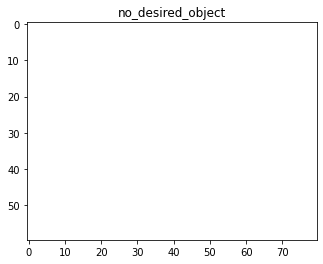

In [124]:
import numpy as np
img_float = next(representative_data_gen())
img_int8 = np.clip(np.round(x / input_scale) + input_zero_point, -128, 127).astype(np.uint8)


#interpreter = tf.lite.Interpreter(model_path="/content/person_detect_model_data.tflite")
#interpreter.allocate_tensors()


input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], img_int8) #p is input image 1, 96, 96, 1

interpreter.invoke()

output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

output_data_float = np.array(output_data, dtype=np.float32)
for i in range(output_data.shape[0]):
    for j in range(output_data.shape[1]):
        output_data_float[i][j] = (output_data[i][j] - output_zero_point) * output_scale  
output_data_postprocessed = np.argmax(output_data_float, axis=-1)

print(output_data)
print(output_data_float)

print("All classes = ", list(train_generator.class_indices.keys()))
plt.imshow(img_float[0].squeeze())
plt.title(list(train_generator.class_indices.keys())[np.argmax(output_data, axis=-1)[0]])
plt.show()



# Visualize prediction using tf and tflite on images

In [29]:
import glob, cv2


pred_folder_path = "/home/glarus/HOOK_PROJECT/DATA_COLLECTION_HOOK/single_img_data3_exracted/all"

trained_model_path = "27june.tflite"


interpreter = tf.lite.Interpreter(model_path=trained_model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for img_path in glob.glob((pred_folder_path+"/*")):
    
    img = cv2.imread(img_path)
    #print("before ", img)
    inp_img = cv2.resize(img, (160, 120))[:,:,::-1]
    #print("after ", inp_img)
    inp_img = np.expand_dims(inp_img, axis = 0)
    #inp_img = 

    #tf inference
    
    pred = model.predict(inp_img)
    
    
    
    #tflite inference
    interpreter.set_tensor(input_details[0]['index'], inp_img)
    
    interpreter.invoke()
    
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    black_img = np.zeros_like(img)
    
    cv2.putText(black_img, "TF " + class_names[np.argmax(pred)], (5, 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    cv2.putText(black_img, "TF " + str(np.round(np.max(pred)*100))+" %", (5, 40),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    
    cv2.putText(black_img, "TFL " + class_names[np.argmax(output_data)], (5, 60),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    cv2.putText(black_img, "TFL " + str(np.round(np.max(output_data)*100))+" %", (5, 80),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    img_and_pred = np.concatenate((img, black_img), axis=1)
    
    cv2.imshow('Live',img_and_pred)
    key = cv2.waitKey(0) & 0xFF
    if  key == ord('Q') or key == ord('q'):
        break
    else:
        pass
    
    

cv2.destroyAllWindows()

1/1 [==============================] - 0s 13ms/step


In [18]:
def auto_adjust_brightness(image, target_mean):

    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)


    l_channel, a_channel, b_channel = cv2.split(lab_image)


    l_mean = np.mean(l_channel)


    target_mean = target_mean # default 150  # Adjust this value as desired

    diff = target_mean - l_mean



    adjusted_l_channel = np.clip(l_channel + diff, 0, 255).astype(np.uint8)


    adjusted_lab_image = cv2.merge((adjusted_l_channel, a_channel, b_channel))

    adjusted_bgr_image = cv2.cvtColor(adjusted_lab_image, cv2.COLOR_LAB2BGR)    
    
    return adjusted_bgr_image

In [20]:
import glob, cv2


pred_folder_path = "/home/glarus/HOOK_PROJECT/DATA_COLLECTION_HOOK/single_img_data3_exracted4/all"

trained_model_path = "30june_80_60_rgb_1900params_custom.tflite"


interpreter = tf.lite.Interpreter(model_path=trained_model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for img_path in sorted(glob.glob((pred_folder_path+"/*"))):
    
    img = cv2.imread(img_path)
    #print("before ", img)
    inp_img = img[:, 0:320, :]
    inp_img = cv2.resize(inp_img, (80, 60))
    inp_img = auto_adjust_brightness(inp_img, 140)
    

    
    inp_img = inp_img[:,:,::-1] #convert to rgb from bgr
    #print("after ", inp_img)

#     cv2.imshow('Live1',inp_img)
#     key = cv2.waitKey(0) & 0xFF
#     if  key == ord('Q') or key == ord('q'):
#         break
#     else:
#         pass    
    
    inp_img = np.expand_dims(inp_img, axis = 0)
    #inp_img = 

    #tf inference
    
    pred = model.predict(inp_img)
    
    
    
    #tflite inference
    interpreter.set_tensor(input_details[0]['index'], inp_img)
    
    interpreter.invoke()
    
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    black_img = np.zeros_like(img[:,0:320,:])
    
    cv2.putText(black_img, "TF " + class_names[np.argmax(pred)], (5, 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    cv2.putText(black_img, "TF " + str(np.round(np.max(pred)*100))+" %", (5, 40),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    
    cv2.putText(black_img, "TFL " + class_names[np.argmax(output_data)], (5, 60),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    cv2.putText(black_img, "TFL " + str(np.round(np.max(output_data)*100))+" %", (5, 80),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    img_and_pred = np.concatenate((img, black_img), axis=1)
    
    cv2.imshow('Live',img_and_pred)
    key = cv2.waitKey(0) & 0xFF
    if  key == ord('Q') or key == ord('q'):
        break
    else:
        pass
    
    
    

cv2.destroyAllWindows()

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


In [103]:
import glob, cv2, time


pred_folder_path = "/home/glarus/HOOK_PROJECT/TRAIN_MODEL_IPYNB_FILE/pred_vis1688011306.8640738"




interpreter = tf.lite.Interpreter(model_path=trained_model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for img_path in sorted(glob.glob((pred_folder_path+"/*"))):
    
    img = cv2.imread(img_path)
    #print("before ", img)
    inp_img = img[:, 0:320, :]
    inp_img = cv2.resize(inp_img, (160, 120))
    cv2.imwrite("/home/glarus/HOOK_PROJECT/DATA_COLLECTION_HOOK/single_img_data3_exracted4/all/"+img_path.split("/")[-1], inp_img)

#     cv2.imshow('Live1',inp_img)
#     key = cv2.waitKey(0) & 0xFF
#     if  key == ord('Q') or key == ord('q'):
#         break
#     elif key == ord('A') or key == ord('a'):
#         cv2.imwrite("/home/glarus/HOOK_PROJECT/DATA_COLLECTION_HOOK/single_img_data3_exracted/angle/"+str(time.time()).replace(".", "")+".jpg", inp_img)
#     elif key == ord('N') or key == ord('n'):
#         cv2.imwrite("/home/glarus/HOOK_PROJECT/DATA_COLLECTION_HOOK/single_img_data3_exracted/none/"+str(time.time()).replace(".", "")+".jpg", inp_img) 
#     elif key == ord('P') or key == ord('p'):
#         cv2.imwrite("/home/glarus/HOOK_PROJECT/DATA_COLLECTION_HOOK/single_img_data3_exracted/pipe/"+str(time.time()).replace(".", "")+".jpg", inp_img)
#     else:
#         pass 
    

    
    

cv2.destroyAllWindows()

In [112]:
pred_folder_path = "/home/glarus/HOOK_PROJECT/TRAIN_MODEL_IPYNB_FILE/pred_vis1687931320.024529"
x = sorted(glob.glob((pred_folder_path+"/*")))

In [114]:
x[0].split("/")[-1]

'1687931327907829.jpg'

In [76]:
tflite_runtime.__version__

'2.12.0'

(1, 120, 160, 3)

In [26]:
black_img = np.zeros_like(img)
black_img.shape

(120, 160, 3)

In [20]:
arr1 = np.zeros((120, 160, 3))
arr2 = np.ones((120, 160, 3))

res = np.concatenate((arr1, arr2), axis=1)

res.shape

(120, 320, 3)

In [21]:
arr1.shape

(120, 160, 3)

In [160]:
!xxd -i ./person_detect_model_data.tflite > person_detect_model_data.cpp


In [161]:

search_text1 = "unsigned char __person_detect_model_data_tflite[]"


replace_text1 = str('#include "person_detect_model_data.h" \n\
#ifdef __has_attribute \n\
#define HAVE_ATTRIBUTE(x) __has_attribute(x) \n\
#else \n\
#define HAVE_ATTRIBUTE(x) 0 \n\
#endif \n\
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__)) \n\
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4))) \n\
#else \n\
#define DATA_ALIGN_ATTRIBUTE \n\
#endif \n\
const unsigned char g_person_detect_model_data[] DATA_ALIGN_ATTRIBUTE')


search_text2 = "unsigned int __person_detect_model_data_tflite_len"

replace_text2 = "const int g_person_detect_model_data_len"

with open(r'person_detect_model_data.cpp', 'r') as file:

    data = file.read()

    data = data.replace(search_text1, replace_text1)
    data = data.replace(search_text2, replace_text2)
  # data = data.replace(search_text2, replace_text2)

with open(r'person_detect_model_data.cpp', 'w') as file:
    file.write(data)
    file.close()



print("Text replaced")


Text replaced
